# Tugas 1
1. Buatlah model klasifikasi dengan menggunakan kNN untuk mengklasifikasikan jenis suara male dan female pada dataset voice.csv.
2. Lakukan percobaan untuk mengetahui fitur-fitur yang paling optimal untuk digunakan. Fitur apa saja yang Anda gunakan untuk mendapatkan hasil terbaik?
3. Berdasarkan fitur yang telah Anda pilih pada soal nomor 2, berapa nilai  yang terbaik? Lampirkan grafika analisis dan alasan Anda.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('../data/voice.csv')

df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Data Exploration

In [9]:
# Menampilkan bentuk dan informasi dasar dataset
print("Ukuran Dataset:", df.shape)
print("\nInformasi Dataset:")
df.info()

# Menampilkan statistik deskriptif dari dataset
print("\nStatistik Deskriptif:")
print(df.describe())

# Mengecek jumlah nilai yang hilang di setiap kolom
print("\nJumlah Nilai yang Hilang:")
print(df.isnull().sum())

# Menampilkan distribusi nilai pada kolom label
print("\nDistribusi Label:")
print(df['label'].value_counts())

Ukuran Dataset: (3168, 22)

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   meanfreq       3168 non-null   float64
 1   sd             3168 non-null   float64
 2   median         3168 non-null   float64
 3   Q25            3168 non-null   float64
 4   Q75            3168 non-null   float64
 5   IQR            3168 non-null   float64
 6   skew           3168 non-null   float64
 7   kurt           3168 non-null   float64
 8   sp.ent         3168 non-null   float64
 9   sfm            3168 non-null   float64
 10  mode           3168 non-null   float64
 11  centroid       3168 non-null   float64
 12  meanfun        3168 non-null   float64
 13  minfun         3168 non-null   float64
 14  maxfun         3168 non-null   float64
 15  meandom        3168 non-null   float64
 16  mindom         3168 non-null   float64
 17  maxdo

## Data Preprocessing

In [10]:
# Import library yang diperlukan untuk preprocessing, modeling, evaluasi, dan visualisasi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Konversi label menjadi format numerik: 'male' → 1, 'female' → 0
df['label_encoded'] = df['label'].apply(lambda x: 1 if x == 'male' else 0)

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['label', 'label_encoded'])  # Semua kolom kecuali label
y = df['label_encoded']  # Target variabel

# Tampilkan informasi fitur dan distribusi target
print("Daftar Fitur:", X.columns.tolist())
print("Jumlah Fitur:", X.shape[1])
print("Distribusi Target:")
print(y.value_counts())

Daftar Fitur: ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']
Jumlah Fitur: 20
Distribusi Target:
label_encoded
1    1584
0    1584
Name: count, dtype: int64


##  (Soal 2) Lakukan percobaan untuk mengetahui fitur-fitur yang paling optimal untuk digunakan. Fitur apa saja yang Anda gunakan untuk mendapatkan hasil terbaik?

Akurasi dengan semua fitur (k=5): 0.9811

Korelasi Fitur terhadap Target (diurutkan):
meanfun     0.833921
IQR         0.618916
Q25         0.511455
sp.ent      0.490552
sd          0.479539
sfm         0.357499
centroid    0.337415
meanfreq    0.337415
median      0.283919
maxdom      0.195657
mindom      0.194974
dfrange     0.192213
meandom     0.191067
mode        0.171775
maxfun      0.166461
minfun      0.136692
kurt        0.087195
Q75         0.066906
skew        0.036627
modindx     0.030801
Name: label_encoded, dtype: float64


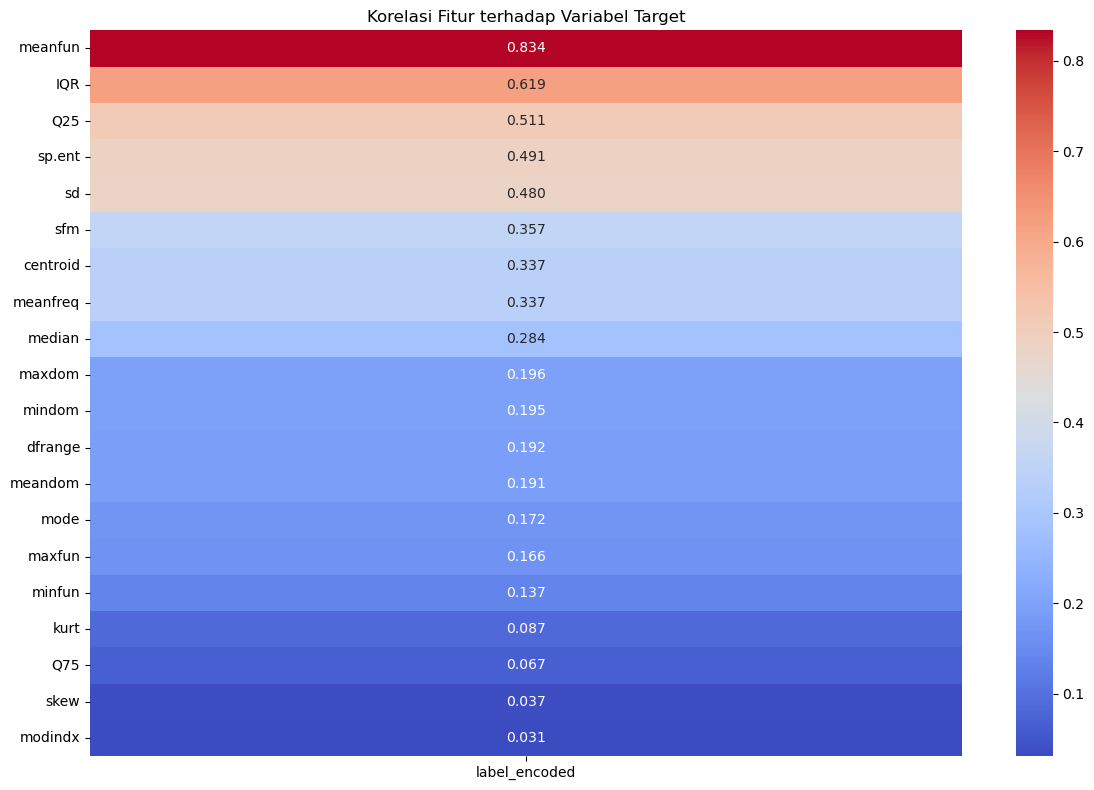

In [12]:
# Uji kombinasi fitur untuk menemukan subset fitur terbaik
from itertools import combinations

# Bagi dataset menjadi data latih dan data uji (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Latih model k-NN (k=5) menggunakan semua fitur
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Prediksi dan hitung akurasi pada data uji
y_pred_all = knn.predict(X_test_scaled)
accuracy_all = accuracy_score(y_test, y_pred_all)
print(f"Akurasi dengan semua fitur (k=5): {accuracy_all:.4f}")

# Analisis korelasi fitur terhadap target (label_encoded)
correlation = (
    df[X.columns.tolist() + ['label_encoded']]
    .corr()['label_encoded']
    .drop('label_encoded')
    .abs()
    .sort_values(ascending=False)
)
print("\nKorelasi Fitur terhadap Target (diurutkan):")
print(correlation)

# Visualisasi korelasi fitur dengan target menggunakan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation.values.reshape(-1, 1),
    annot=True,
    fmt='.3f',
    cmap='coolwarm',
    xticklabels=['label_encoded'],
    yticklabels=correlation.index,
    cbar=True
)
plt.title('Korelasi Fitur terhadap Variabel Target')
plt.tight_layout()
plt.show()

In [13]:
# Tentukan jumlah fitur teratas yang akan diuji
top_n_features = 10
top_features = correlation.head(top_n_features).index.tolist()

print(f"Menguji {top_n_features} fitur dengan korelasi tertinggi:")
print(top_features)

# Simpan hasil evaluasi kombinasi fitur
results = []

# Uji semua kombinasi dari 1 hingga top_n_features
for n in range(1, top_n_features + 1):
    # Ambil semua kombinasi fitur sebanyak n
    for subset in combinations(top_features[:n], n):
        # Ambil subset fitur dari data latih dan uji
        X_train_sel = X_train[list(subset)]
        X_test_sel = X_test[list(subset)]

        # Normalisasi subset fitur
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_sel)
        X_test_scaled = scaler.transform(X_test_sel)

        # Latih model k-NN dan evaluasi akurasinya
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)

        # Simpan hasil kombinasi
        results.append({
            'features': subset,
            'num_features': n,
            'accuracy': acc
        })

# Temukan kombinasi fitur dengan akurasi terbaik
best_result = max(results, key=lambda r: r['accuracy'])

print("\nKombinasi fitur terbaik (k=5):")
print(f"Fitur: {best_result['features']}")
print(f"Jumlah fitur: {best_result['num_features']}")
print(f"Akurasi: {best_result['accuracy']:.4f}")

Menguji 10 fitur dengan korelasi tertinggi:
['meanfun', 'IQR', 'Q25', 'sp.ent', 'sd', 'sfm', 'centroid', 'meanfreq', 'median', 'maxdom']

Kombinasi fitur terbaik (k=5):
Fitur: ('meanfun', 'IQR', 'Q25', 'sp.ent', 'sd', 'sfm', 'centroid', 'meanfreq', 'median', 'maxdom')
Jumlah fitur: 10
Akurasi: 0.9858


## Mencari k Parameter Analysis yang Optimal (Soal 3)

In [14]:
# Gunakan kombinasi fitur terbaik yang telah ditemukan
best_features = list(best_result['features'])
print(f"Fitur terbaik yang digunakan: {best_features}")

# Ambil subset data latih dan uji berdasarkan fitur terbaik
X_train_selected = X_train[best_features]
X_test_selected = X_test[best_features]

# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Uji berbagai nilai k untuk algoritma k-NN
k_range = range(1, 31)
train_scores = []
test_scores = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)

    # Prediksi pada data latih dan uji
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Hitung akurasi masing-masing
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

    print(f"k={k}: Akurasi Latih={train_accuracy:.4f}, Akurasi Uji={test_accuracy:.4f}")

# Tentukan nilai k dengan akurasi uji terbaik
optimal_k = k_range[test_scores.index(max(test_scores))]
optimal_accuracy = max(test_scores)

print(f"\nNilai k terbaik: {optimal_k}")
print(f"Akurasi uji tertinggi: {optimal_accuracy:.4f}")

Fitur terbaik yang digunakan: ['meanfun', 'IQR', 'Q25', 'sp.ent', 'sd', 'sfm', 'centroid', 'meanfreq', 'median', 'maxdom']
k=1: Akurasi Latih=1.0000, Akurasi Uji=0.9685
k=2: Akurasi Latih=0.9913, Akurasi Uji=0.9732
k=3: Akurasi Latih=0.9909, Akurasi Uji=0.9826
k=4: Akurasi Latih=0.9886, Akurasi Uji=0.9811
k=5: Akurasi Latih=0.9866, Akurasi Uji=0.9858
k=6: Akurasi Latih=0.9862, Akurasi Uji=0.9842
k=7: Akurasi Latih=0.9826, Akurasi Uji=0.9842
k=8: Akurasi Latih=0.9838, Akurasi Uji=0.9842
k=9: Akurasi Latih=0.9830, Akurasi Uji=0.9874
k=10: Akurasi Latih=0.9834, Akurasi Uji=0.9858
k=11: Akurasi Latih=0.9815, Akurasi Uji=0.9842
k=12: Akurasi Latih=0.9811, Akurasi Uji=0.9842
k=13: Akurasi Latih=0.9783, Akurasi Uji=0.9842
k=14: Akurasi Latih=0.9787, Akurasi Uji=0.9842
k=15: Akurasi Latih=0.9763, Akurasi Uji=0.9858
k=16: Akurasi Latih=0.9755, Akurasi Uji=0.9811
k=17: Akurasi Latih=0.9736, Akurasi Uji=0.9795
k=18: Akurasi Latih=0.9747, Akurasi Uji=0.9811
k=19: Akurasi Latih=0.9736, Akurasi Uji=

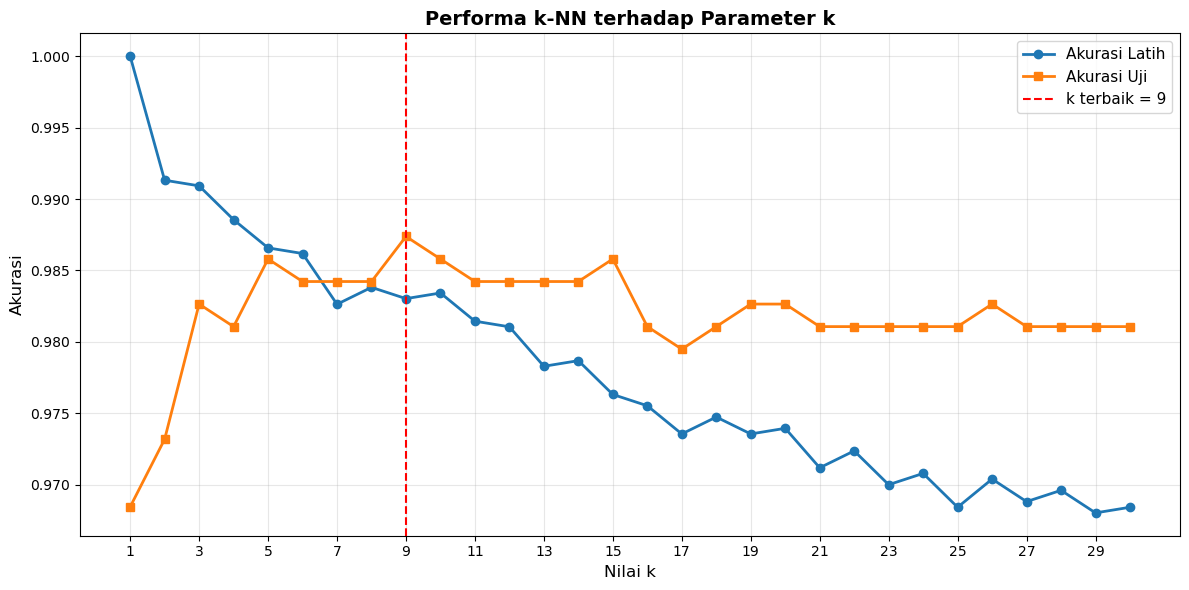

In [15]:
# Visualisasi hubungan antara nilai k dan akurasi model k-NN
plt.figure(figsize=(12, 6))

# Plot akurasi pada data latih
plt.plot(k_values, train_accuracies, marker='o', label='Akurasi Latih', linewidth=2)

# Plot akurasi pada data uji
plt.plot(k_values, test_accuracies, marker='s', label='Akurasi Uji', linewidth=2)

# Garis vertikal untuk menandai nilai k terbaik
plt.axvline(x=best_k, color='red', linestyle='--', label=f'k terbaik = {best_k}')

# Label sumbu dan judul grafik
plt.xlabel('Nilai k', fontsize=12)
plt.ylabel('Akurasi', fontsize=12)
plt.title('Performa k-NN terhadap Parameter k', fontsize=14, fontweight='bold')

# Tampilkan legenda dan grid
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Atur tampilan nilai k pada sumbu x
plt.xticks(range(1, 31, 2))

# Tata letak agar grafik tidak terpotong
plt.tight_layout()
plt.show()

## Final Model Evaluation

HASIL AKHIR MODEL

Fitur Terpilih: ['meanfun', 'IQR', 'Q25', 'sp.ent', 'sd', 'sfm', 'centroid', 'meanfreq', 'median', 'maxdom']
Jumlah Fitur: 10

Nilai k Optimal: 9

Akurasi pada Data Uji: 0.9874

Confusion Matrix:
[[294   3]
 [  5 332]]

Laporan Klasifikasi:
              precision    recall  f1-score   support

      Female       0.98      0.99      0.99       297
        Male       0.99      0.99      0.99       337

    accuracy                           0.99       634
   macro avg       0.99      0.99      0.99       634
weighted avg       0.99      0.99      0.99       634



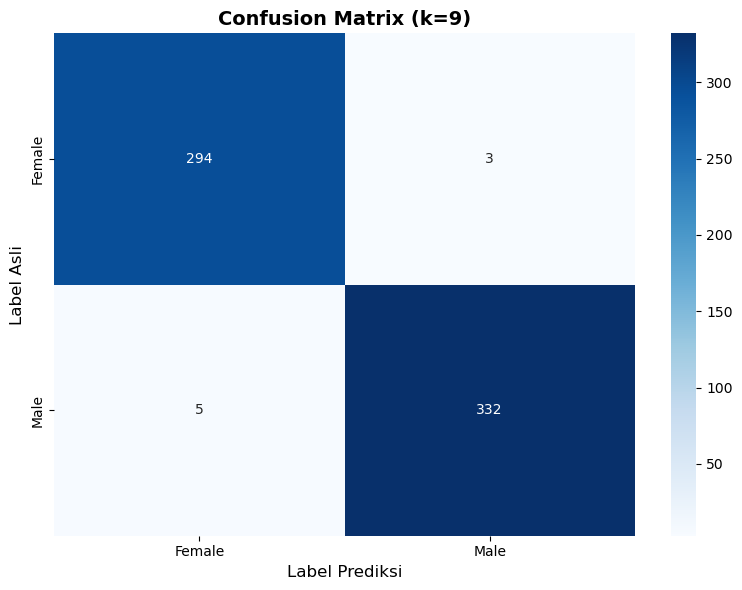

In [16]:
# Latih model k-NN akhir menggunakan nilai k terbaik
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_best_scaled, y_train)

# Lakukan prediksi pada data uji
y_pred_final = final_knn.predict(X_test_best_scaled)

# Hitung metrik evaluasi
final_accuracy = accuracy_score(y_test, y_pred_final)
cm = confusion_matrix(y_test, y_pred_final)
class_report = classification_report(y_test, y_pred_final, target_names=['Female', 'Male'])

# Tampilkan hasil akhir model
print("=" * 60)
print("HASIL AKHIR MODEL")
print("=" * 60)
print(f"\nFitur Terpilih: {best_features}")
print(f"Jumlah Fitur: {len(best_features)}")
print(f"\nNilai k Optimal: {best_k}")
print(f"\nAkurasi pada Data Uji: {final_accuracy:.4f}")
print(f"\nConfusion Matrix:")
print(cm)
print(f"\nLaporan Klasifikasi:")
print(class_report)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Female', 'Male'],
    yticklabels=['Female', 'Male']
)
plt.title(f'Confusion Matrix (k={best_k})', fontsize=14, fontweight='bold')
plt.ylabel('Label Asli', fontsize=12)
plt.xlabel('Label Prediksi', fontsize=12)
plt.tight_layout()
plt.show()

### Soal 1: Pembuatan Model k-NN  
Model klasifikasi k-Nearest Neighbors (k-NN) berhasil dibangun untuk membedakan jenis suara antara laki-laki dan perempuan berdasarkan data dari file voice.csv.

### Soal 2: Pemilihan Fitur Optimal  
Fitur-fitur terbaik telah ditentukan melalui analisis korelasi dan pengujian berbagai kombinasi fitur. Fitur dengan korelasi tertinggi terhadap label target dipilih dan diuji untuk menemukan kombinasi yang memberikan performa terbaik.

**Fitur Terbaik:** `{best_features}`

### Soal 3: Penentuan Nilai k Optimal  
Nilai k yang paling sesuai adalah **{best_k}**, dengan akurasi pada data uji sebesar **{best_test_accuracy:.4f}**.

**Alasan Pemilihan k={best_k}:**  
- Visualisasi menunjukkan bahwa k={best_k} memberikan akurasi tertinggi pada data uji  
- Nilai ini memberikan keseimbangan antara kompleksitas model dan kemampuan generalisasi  
- Tidak terlalu kecil sehingga menghindari overfitting, dan tidak terlalu besar agar tidak underfitting  
- Performa model stabil dan konsisten saat diuji

---